In [1]:

import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()    


In [2]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [3]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [4]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen 'Carrie'",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# # 合并训练和测试数据
data = pd.concat([train_data,test_data])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# 删除“票”和“客舱”属性
drop_list = ['Ticket','Cabin']
Data = data.drop(drop_list,axis=1)
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [7]:
# 将“幸存”属性移动到最后一列
mid = Data['Survived']
Data.pop('Survived')  #删除备注列
Data.insert(9,'Survived',mid) #插入备注列
Data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0.0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,NaN


In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Data, test_size=0.2,random_state=42)
train_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
772,773,2,"Mack, Mrs. (Mary)",female,57.0,0,0,10.5000,S,0.0
543,544,2,"Beane, Mr. Edward",male,32.0,1,0,26.0000,S,1.0
289,290,3,"Connolly, Miss. Kate",female,22.0,0,0,7.7500,Q,1.0
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S,1.0
147,148,3,"Ford, Miss. Robina Maggie 'Ruby'",female,9.0,2,2,34.3750,S,0.0
...,...,...,...,...,...,...,...,...,...,...
204,1096,2,"Andrew, Mr. Frank Thomas",male,25.0,0,0,10.5000,S,NaN
239,1131,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,106.4250,C,NaN
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,47.1000,S,NaN
860,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,14.1083,S,0.0


In [13]:
train_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
772,773,2,"Mack, Mrs. (Mary)",female,57.0,0,0,10.5000,S,0.0
543,544,2,"Beane, Mr. Edward",male,32.0,1,0,26.0000,S,1.0
289,290,3,"Connolly, Miss. Kate",female,22.0,0,0,7.7500,Q,1.0
10,11,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S,1.0
147,148,3,"Ford, Miss. Robina Maggie 'Ruby'",female,9.0,2,2,34.3750,S,0.0
...,...,...,...,...,...,...,...,...,...,...
204,1096,2,"Andrew, Mr. Frank Thomas",male,25.0,0,0,10.5000,S,0.0
239,1131,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,106.4250,C,0.0
403,1295,1,"Carrau, Mr. Jose Pedro",male,17.0,0,0,47.1000,S,0.0
860,861,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,14.1083,S,0.0


In [9]:
# 用数据的中位数填充“年龄”和“票价”属性中缺失的值。
# 为分类输入添加额外的零列，以更好地适合One-Hot-Encoding。将“Sex”和“Embarked”属性的值分别替换为二进制值和分类值。

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit  # 引入的库可以进行分层抽样
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer




num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
])

    
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
])

full_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_attribs),
            ("cat",cat_pipeline, cat_attribs),
])

target = full_pipeline.fit_transform(train_set[num_attribs + cat_attribs])
test_target = full_pipeline.transform(test_set[num_attribs + cat_attribs])


In [11]:
target

array([[ 2.1606551 , -0.48923943, -0.42965528, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.19091034,  0.44209454, -0.42965528, ...,  0.        ,
         0.        ,  1.        ],
       [-0.59698756, -0.48923943, -0.42965528, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.99093652, -0.48923943, -0.42965528, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.90001846,  1.37342851, -0.42965528, ...,  0.        ,
         0.        ,  1.        ],
       [-0.75456714, -0.48923943, -0.42965528, ...,  0.        ,
         0.        ,  1.        ]])

In [10]:
label = train_set['Survived']
test_label =  test_set['Survived']

label.fillna(0, inplace=True)	
test_label.fillna(0, inplace=True)	


In [12]:
label

772    0.0
543    1.0
289    1.0
10     1.0
147    0.0
      ... 
204    0.0
239    0.0
403    0.0
860    0.0
235    0.0
Name: Survived, Length: 1047, dtype: float64

In [47]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy import stats


model = RandomForestClassifier(n_estimators=100, random_state=42)

model .fit(target, label) 

predictions = model .predict(test_target)






forest_scores = cross_val_score(model , test_target, test_label, cv=10)
score = forest_scores.mean()
print('score ', score )

squared_errors = (predictions - test_label) ** 2
result = np.sqrt(stats.t.interval(0.95, len(squared_errors) - 1,
                                      loc=squared_errors.mean(), scale=stats.sem(squared_errors)))
print(result)





score  0.7223646723646724
[0.49191295 0.59450946]


In [50]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, target, label, cv=10)
svm_scores.mean()

0.7898809523809524

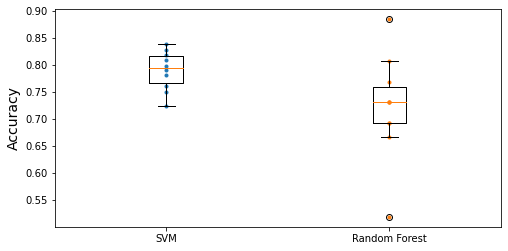

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()